In [1]:
#Capstone1: Credit Card Fraud
#1.Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#2. Import data
fn='creditcard.csv'
#Uncomment this in github fn='/Data/creditcard.csv'
df = pd.read_csv(fn)

In [4]:
#3.1 Summary stats 
# Check missing data
df.isnull().any().sum() 

0

In [5]:
print(df.info())
print(df.shape)
print(df.columns)
print(df.describe())
print(df.head(5))
print(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

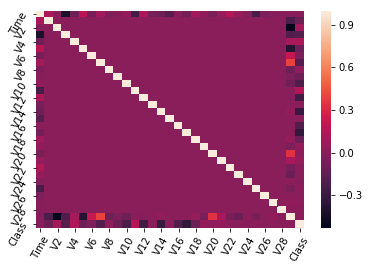

In [9]:
#Visualize correlations between all variables
sns.heatmap(df.corr())
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

From the above graph we can see, the features V1-V28 in the data set are totally uncorrelated, as they should be obtained from PCA.

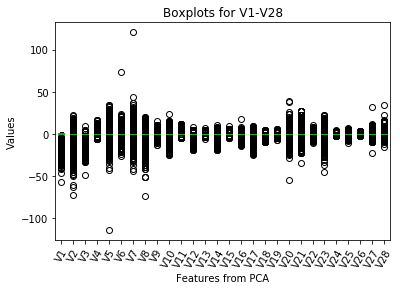

In [7]:
#By different categories: PCA features, Time, Amount, and Class(fraud or not)
#Visual EDA, PCA features plot
df_pca = df.iloc[:,1:29]
df_pca.plot(kind='Box')
plt.xticks(rotation=60)
plt.title('Boxplots for V1-V28')
plt.xlabel('Features from PCA')
plt.ylabel('Values')
plt.show()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
124592


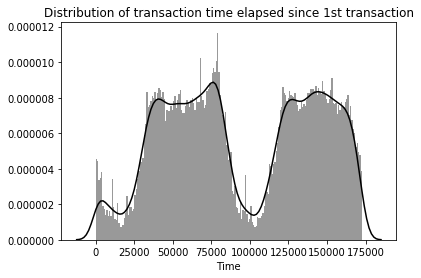

In [10]:
#EDA and visual EDA for time
print(df['Time'].describe())
print(len(df['Time'].value_counts())) 
plt.figure()
sns.distplot(df['Time'], bins = 200, norm_hist = True, color = 'black') 
plt.title('Distribution of transaction time elapsed since 1st transaction')
plt.show()

In [11]:
#Convert time into datetime obejct
from datetime import datetime, timedelta
def GetTime(time):
    sec = timedelta(seconds=time)
    d = datetime(1,1,1) + sec
    return d 
    #return "%d:%d:%d:%d" % (d.day-1, d.hour, d.minute, d.second)      
df_newtime = [GetTime(time) for ind, time in df['Time'].iteritems()]
df['Newtime'] = df_newtime 
#Extract hour information
df['hour'] = [(GetTime(time)).hour for ind, time in df['Time'].iteritems()]

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


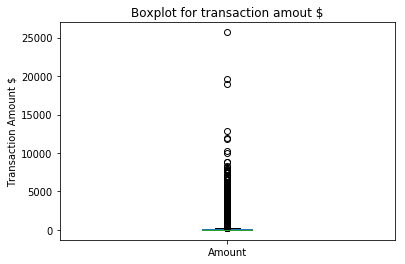

In [12]:
#EDA and visual EDA for amount 
print(df['Amount'].describe())
plt.figure()
df.plot(y='Amount', kind='box')
plt.title('Boxplot for transaction amout $')
plt.ylabel('Transaction Amount $')
plt.show()

In [13]:
#Class ==1:fraud. Confirm the number of frauds in the dataset.(Expected: Inbalanced)
fnum = df['Class'].sum()
fperc = float(fnum)/len(df['Class'])
print(fperc)

0.00172748563062


In [14]:
#3.2 EDA comparing fraud vs. legal transactions 
frauds=df[df['Class']==1]
legals=df[df['Class']==0]

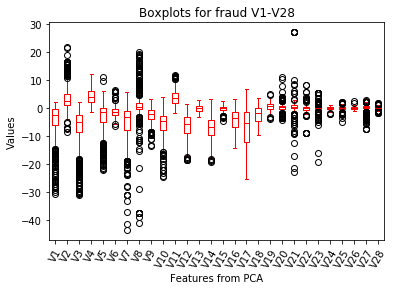

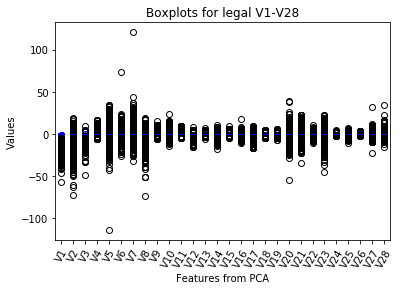

In [15]:
#V1-V28, boxplots for fraud and legal transactions 
frauds.iloc[:,1:29].plot(kind='Box', color = 'red')
plt.xticks(rotation=60)
plt.title('Boxplots for fraud V1-V28')
plt.xlabel('Features from PCA')
plt.ylabel('Values')
plt.show()
plt.savefig('Boxplots for fraud V1-V28.png')
legals.iloc[:,1:29].plot(kind='Box', color = 'blue')
plt.xticks(rotation=60)
plt.title('Boxplots for legal V1-V28')
plt.xlabel('Features from PCA')
plt.ylabel('Values')
plt.show()

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28'],
      dtype='object')


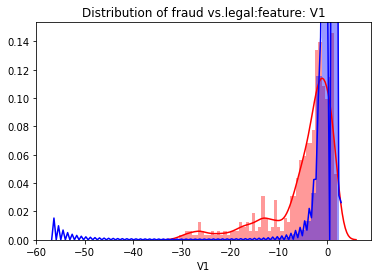

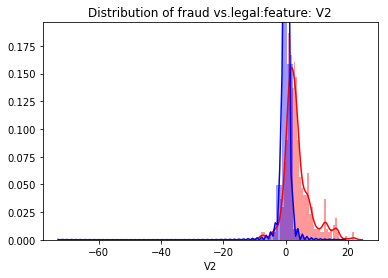

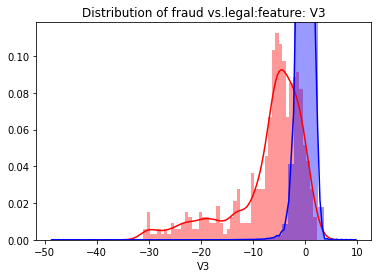

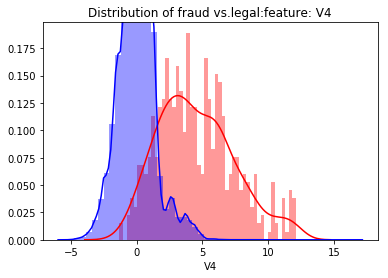

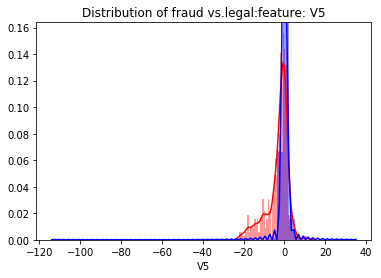

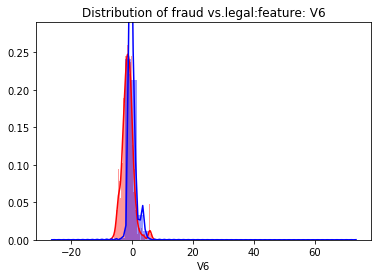

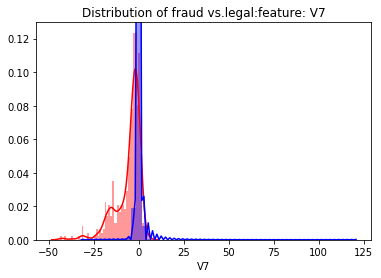

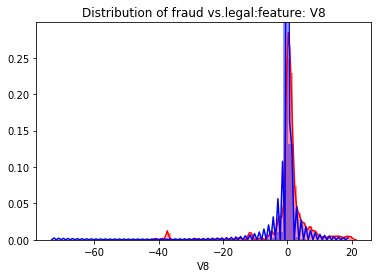

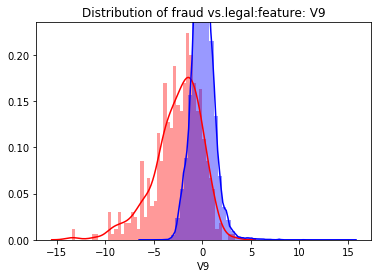

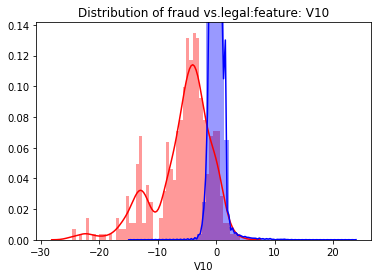

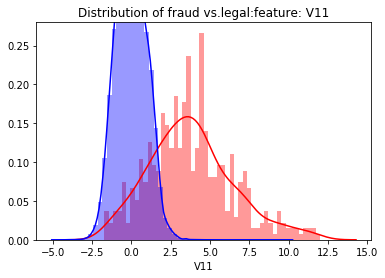

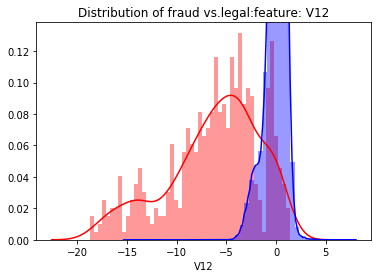

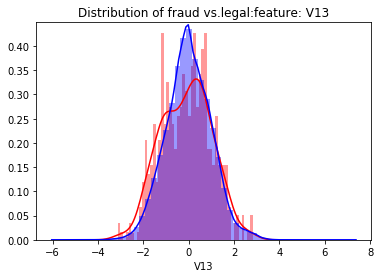

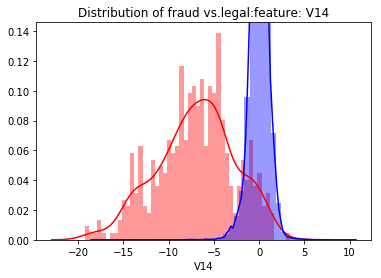

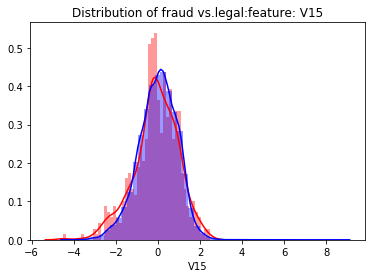

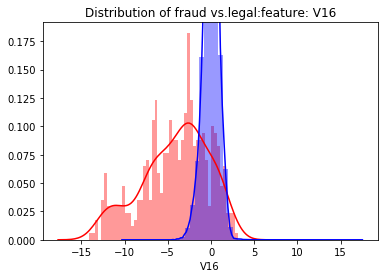

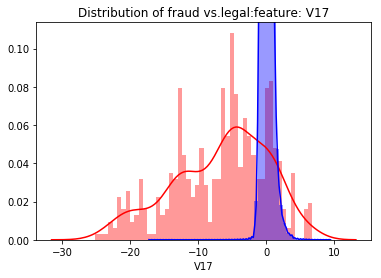

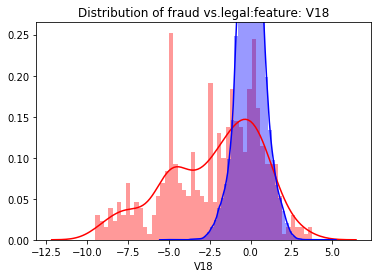

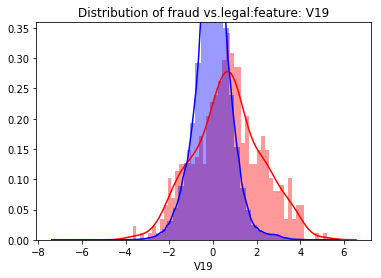

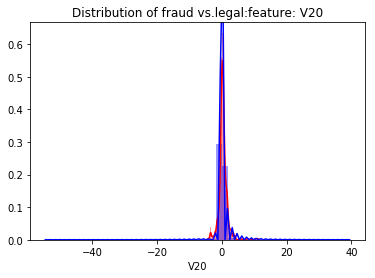

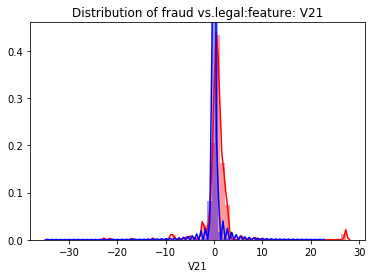

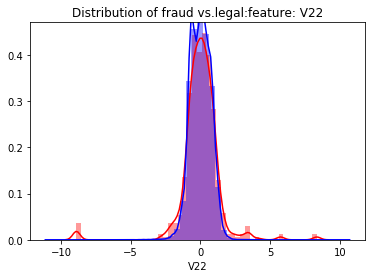

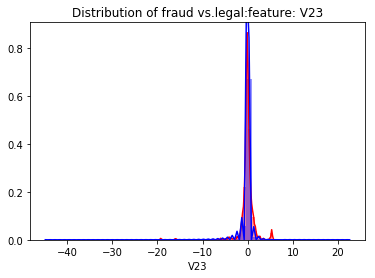

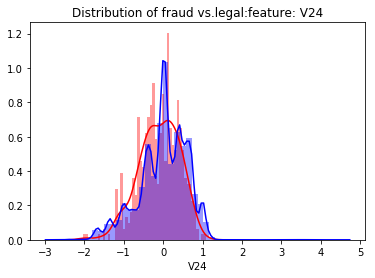

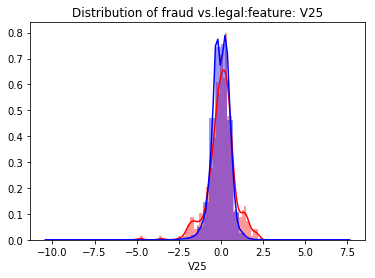

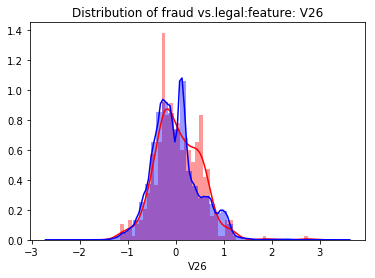

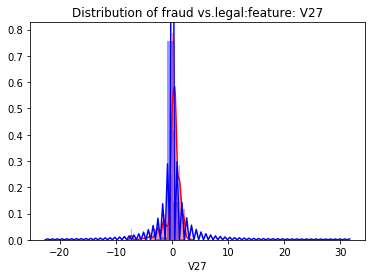

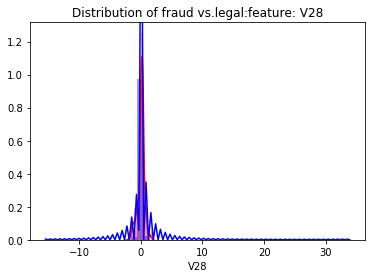

In [16]:
#Iterate through the 28 features and compare distibution for each fraud&legal pair
pca_names = df_pca.columns
print(pca_names)
for i, V in enumerate(df[pca_names]):
    plt.figure(i+1)
    sns.distplot(frauds[V], bins = 50, norm_hist = True, color = 'red')
    sns.distplot(legals[V], bins = 50, norm_hist = True, color = 'blue')
    plt.title('Distribution of fraud vs.legal:feature: ' + str(V))
    plt.show()
    plt.savefig(str(V)+'.png')
    plt.close()

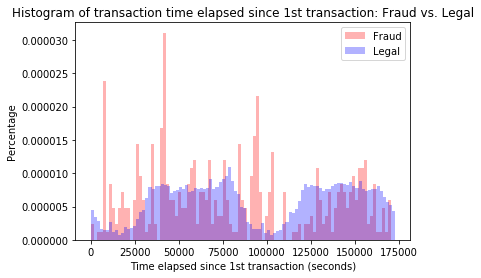

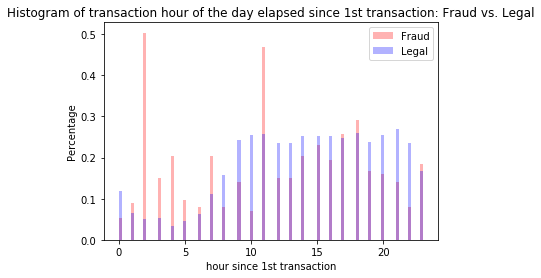

In [17]:
#Time, distribution plots for fraud vs. legal 
plt.figure()
frauds.Time.plot(kind='hist', bins=100, color = 'red', normed= True,label= 'Fraud', alpha = 0.3)
legals.Time.plot(kind='hist', bins=100, color = 'blue', normed= True, label= 'Legal',alpha = 0.3)
plt.legend(loc='upper right')
plt.title('Histogram of transaction time elapsed since 1st transaction: Fraud vs. Legal')
plt.xlabel('Time elapsed since 1st transaction (seconds)')
plt.ylabel('Percentage')
plt.show()
plt.savefig('Fraud vs. Legal Transaction Time.png')
#Check the hours 
plt.figure()
frauds.hour.plot(kind='hist', bins=100, color = 'red', normed= True,label= 'Fraud', alpha = 0.3)
legals.hour.plot(kind='hist', bins=100, color = 'blue', normed= True, label= 'Legal',alpha = 0.3)
plt.legend(loc='upper right')
plt.title('Histogram of transaction hour of the day elapsed since 1st transaction: Fraud vs. Legal')
plt.xlabel('hour since 1st transaction')
plt.ylabel('Percentage')
plt.show()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


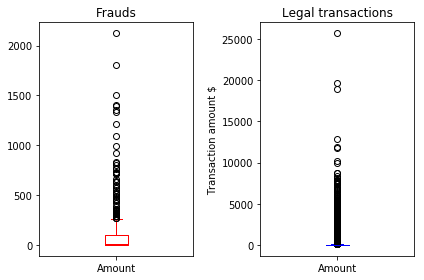

In [18]:
#Amount,summary stats and plots for fraud vs. legal 
print(frauds.Amount.describe())
print(legals.Amount.describe())
plt.figure()
plt.subplot(1,2,1)
frauds.Amount.plot(kind='Box',color = 'red')
plt.title('Frauds')
plt.subplot(1,2,2)
legals.Amount.plot(kind='Box',color = 'blue')
plt.title('Legal transactions')
plt.ylabel('Transaction amount $')
plt.tight_layout()
plt.show()

Fraud transactions are all over 0 (which is logical), and dispersed throughout around 250 to 2000. And even though legal transactions have some extremely large values, the fraud transactions has a higher average (122 vs. 88). 

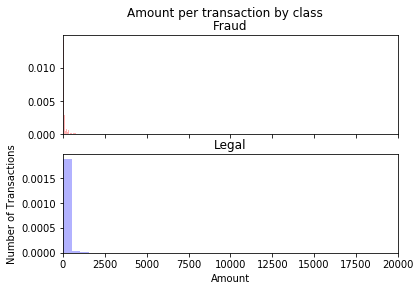

In [46]:
#Different visualization, not very informative
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins, color = 'red', normed= True,label= 'Fraud', alpha = 0.3)
ax1.set_title('Fraud')

ax2.hist(legals.Amount, bins = bins, color = 'blue', normed= True,label= 'Legal', alpha = 0.3) 
ax2.set_title('Legal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.show()

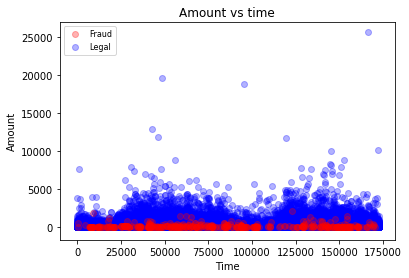

In [45]:
#Amount Vs time, how the amount distributed with time
n0=plt.scatter(legals.Time, legals.Amount,color='blue', label='Legal', alpha = 0.3)
n1=plt.scatter(frauds.Time, frauds.Amount,color='red', label='Fraud', alpha = 0.3)

plt.legend((n1, n0),('Fraud', 'Legal'),scatterpoints=1, loc='upper left', ncol=1, fontsize=8)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount vs time')
plt.rcParams['font.size']=10
plt.show()

In [47]:
#t-test on V1-V28 
from scipy import stats
for col in pca_names:
    sample =  frauds[col]
    pop = legals[col]
    print(col, stats.ttest_ind(sample,pop))

('V1', Ttest_indResult(statistic=-54.366064281917588, pvalue=0.0))
('V2', Ttest_indResult(statistic=48.922404666933588, pvalue=0.0))
('V3', Ttest_indResult(statistic=-104.95002765789474, pvalue=0.0))
('V4', Ttest_indResult(statistic=71.859808754902303, pvalue=0.0))
('V5', Ttest_indResult(statistic=-50.915203316632081, pvalue=0.0))
('V6', Ttest_indResult(statistic=-23.313313312405914, pvalue=4.2131113453230875e-120))
('V7', Ttest_indResult(statistic=-101.73301041335795, pvalue=0.0))
('V8', Ttest_indResult(statistic=10.608877735555245, pvalue=2.7406731012471892e-26))
('V9', Ttest_indResult(statistic=-52.408017261455427, pvalue=0.0))
('V10', Ttest_indResult(statistic=-118.56635266832792, pvalue=0.0))
('V11', Ttest_indResult(statistic=83.662148232588805, pvalue=0.0))
('V12', Ttest_indResult(statistic=-144.04798631472968, pvalue=0.0))
('V13', Ttest_indResult(statistic=-2.4387850155181048, pvalue=0.01473733896100562))
('V14', Ttest_indResult(statistic=-169.39760266328938, pvalue=0.0))
('V15'

In [48]:
#t-test for amount
sample = frauds.Amount
pop  = legals.Amount
print(stats.ttest_ind(sample,pop,equal_var = False))

Ttest_indResult(statistic=2.9287895308564669, pvalue=0.003560518851710299)


TO DO (based on readings)
Re-scale the features? 
Select optimum feature numbers for different models? Some drop the time, some don't.
Using metrics: precision, recall, f1-score, and ROC AUC 